In [1]:
import numpy as np
import cmath
from scipy import optimize as opt
from matplotlib import pyplot as pp

import cmath
import scipy

import time

In [236]:
m=1.
W=1.

SCm=3.
mu=30.
muSC=60.

v0=cmath.sqrt(2/SCm*muSC)*W

#def k1(s,B): return cmath.sqrt(2*m*W*(mu+(-1)**(s)*B)) #spin up:s=1 & spin down:s=0

def EQsign(B,phi):
    vtw=cmath.sqrt(2/m*(mu+B))*W
    vap=cmath.sqrt(2/m*(mu-B))*W
    SS=(vtw*vap)/v0**2+v0**2/(vtw*vap)
    return abs((np.cos(vtw*m)*np.cos(vap*m)+SS/2.*np.sin(vtw*m)*np.sin(vap*m)\
                +np.cos(phi))/np.cos(vap*m)) #cos is useful to normalize the function when B>mu (cosh)

In [237]:
start=time.time()
M=100
phiarray=np.linspace(0,2*np.pi,M+1)
#phiarray=[0]

Bmin=0.
Bmax=60.
x0roots=np.linspace(Bmin+0.0001,Bmax+0.0001,np.int((Bmax-Bmin)/1.)+1)
BphiList=[0]*len(phiarray)

for j in range(len(phiarray)):
    phi=phiarray[j]
    #print('{}) phi={}'.format(j+1,phi))
    
    def EQsignred(B):
        return EQsign(B,phi)
    
    Barray=[]
    for i in range(len(x0roots)):
        #print('{}-{}'.format(j+1,i+1))
        x0=x0roots[i]
        solekx=opt.fsolve(EQsignred,np.asarray(x0))
        if abs(EQsignred(solekx))>10**-10 or solekx<=0:
            solekx=[]
        solekx=np.ndarray.tolist(np.around(solekx,6))
        #print(solekx)
        Barray.extend(solekx)
    Barray=sorted(list(set(Barray)))
    BphiList[j]=Barray

end=time.time()
print('duration={}'.format(end-start))

duration=1.31005001068


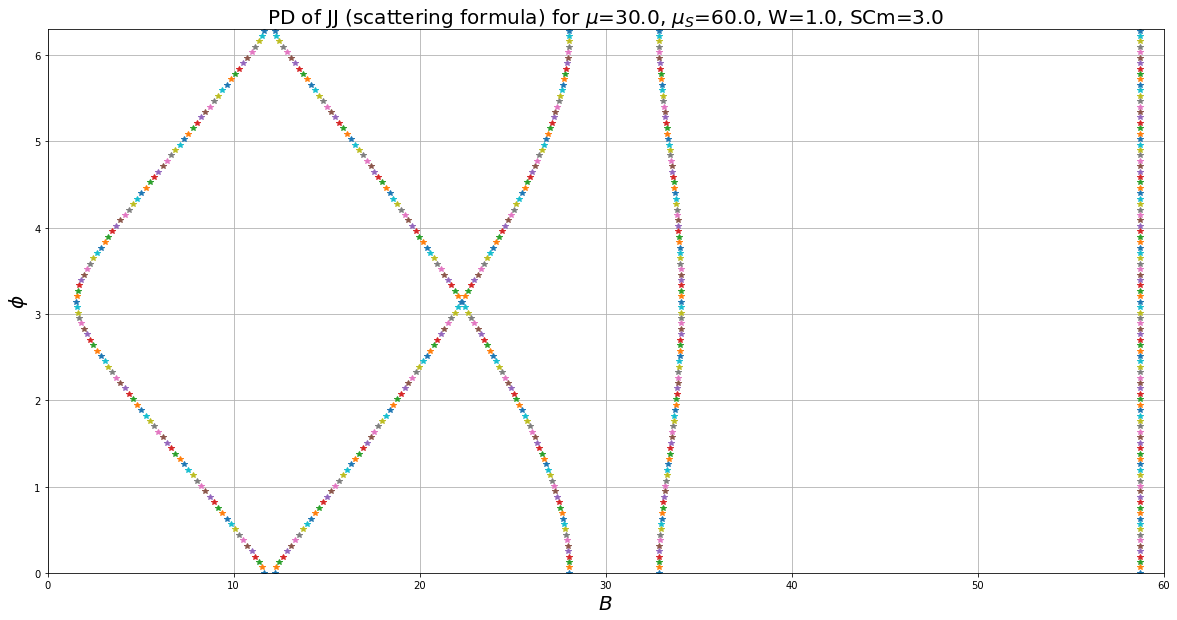

In [238]:
pp.figure(figsize=(20,10))
for i in range(len(phiarray)):
    pp.plot(BphiList[i],[phiarray[i]]*len(BphiList[i]),'*')

pp.axis([Bmin,Bmax,0,6.3])
pp.title('PD of JJ (scattering formula) for $\mu$={}, $\mu_S$={}, W={}, SCm={}'.format(mu,muSC,W,SCm), fontsize=20)
pp.xlabel('$B$',fontsize=20)
pp.ylabel('$\phi$',fontsize=20)
pp.grid()

In [211]:
BphiList3=BphiList

In [216]:
BphiList=[BphiList2[i][j]-BphiList3[i][j] for i in range(len(phiarray)) for j in range(5)]

** Search for tendencies **

In [68]:
Bphiplot=BphiList[0]

In [71]:
Bphiplot[5:6]=[]

In [72]:
len(Bphiplot)

19

In [73]:
Bphiplot

[42.717831,
 45.824248,
 114.919117,
 142.037693,
 171.152123,
 268.190191,
 398.705791,
 547.059507,
 712.98399,
 896.970903,
 1099.620518,
 1321.458708,
 1562.876355,
 1824.130134,
 2105.369682,
 2406.669658,
 3069.529687,
 4214.262105,
 6020.350054]

In [95]:
ld=len(Bphiplot)
n=np.linspace(1,ld+1,ld+1)
mun=(np.pi*n)**2/2/m/W**2

#high B
#tht=-mu+((n+15)*np.pi)**2/2/m/W**2-4*(n*np.pi)**3/(2*m*W**2)**2/muSC
#low B
phi=np.pi*0
gamm=.5*4*np.sqrt(mun/muSC)/(m*W**2/n/np.pi)
dmu=-mun+mu
tht=sorted(np.sqrt(dmu**2+.5*gamm**2*(1+np.cos(phi))))
print(tht)

[46.58590746790282, 56.20256929801306, 111.73988863343553, 160.59923767597954, 161.6779314441568, 190.1344941772923, 290.13281260907155, 438.9869774804154, 607.907460407569, 796.8012229294646, 1005.6322950489237, 1234.383934100418, 1483.04733852054, 1751.6174634820889, 2040.0912237534553, 2348.4666347157035, 2676.7423668633114, 3024.9174993461265, 3392.991376288363, 3780.9635193047206]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

Text(0,0.5,'B')

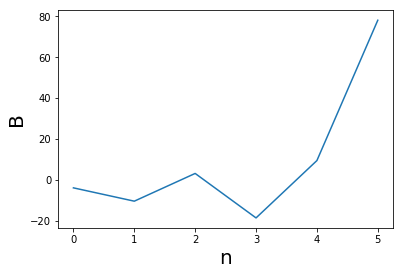

In [90]:
#pp.plot(Bphiplot,'*')
#pp.plot(tht)
#pp.plot([0,len(Bphiplot)+1],[muSC,muSC])
pp.plot(np.array(Bphiplot[0:6])-np.array(tht[0:6]))
pp.xlabel('n',fontsize=20)
pp.ylabel('B',fontsize=20)
#pp.axis([0,11,0,1000])

** mu-B phase diagram **

In [38]:
start=time.time()

phi=0.5*2*np.pi

M=50
muarray=np.linspace(0.001,60.,M+1)

Bmin=0.
Bmax=40.
x0roots=np.linspace(Bmin,Bmax,np.int((Bmax-Bmin)/0.1)+1)
BmuList=[0]*len(muarray)

for j in range(len(muarray)):
    mu=muarray[j]
    #print('{}) phi={}'.format(j+1,phi))
    
    def EQsignred(B):
        return EQsign(B,phi)
    
    Barray=[]
    for i in range(len(x0roots)):
        #print('{}-{}'.format(j+1,i+1))
        x0=x0roots[i]
        solekx=opt.fsolve(EQsignred,np.asarray(x0))
        if abs(EQsignred(solekx))>10**-10 or solekx<=0:
            solekx=[]
        solekx=np.ndarray.tolist(np.around(solekx,6))
        #print(solekx)
        Barray.extend(solekx)
    Barray=sorted(list(set(Barray)))
    BmuList[j]=Barray

end=time.time()
print('duration={}'.format(end-start))

duration=8.27912211418


In [237]:
xarray=np.linspace(0,25000,10000)
yarray=np.linspace(1,25000,10000)
H=8
yyarray=[0]*(H+1)
xx3=[0]*(H+1)
xx2=[[0]*len(yarray)]*(H+1)
for n in range(-H,1):
    yyarray[n]=[-BB+1/(2*m*W**2)*(n*np.pi+2*np.arctan(BB/muSC))**2 for BB in xarray]
    #xx3[n]=[-2*mmu/muSC/np.sqrt(2*m*mmu*W**2)*(np.pi*n-np.pi/2+muSC/mu*np.sin(np.sqrt(2*m*mmu*W**2))) for mmu in yarray]
    for l in range(len(yarray)):
        mmu=yarray[l]
    #    aaa=(2*m*W**2*mmu-8*mmu**2/muSC**2)**2
    #    bbb=(2*m*W**2*mmu)**2-(8*mmu**2/muSC**2)**2-2*m*W**2*mmu*(n*np.pi)**2-8*mmu**2/muSC**2*(n*np.pi)**2
    #    ccc=(2*m*W**2*mmu+8*mmu**2/muSC**2-(n*np.pi)**2)**2+32*mu**2/muSC**2*(n*np.pi)**2
    #    xx2[n][l]=mmu*(-bbb+np.sqrt(bbb**2-aaa*ccc))/aaa
        cth=np.cos(np.sqrt(2*m*mmu*W**2))
        sth=np.sin(np.sqrt(2*m*mmu*W**2))
        aaa=-1-cth**2-sth**2/2*(mmu+1/mmu)
        #bbb=-sth**2*(2*m*mmu*W**2)/4+sth**2/4*(1/mmu-mmu)-cth**2*(2*m*mmu*W**2)/8*(mmu+1/mmu)
        bbb=sth**2/4*(1/mmu-mmu)-(2*m*mmu*W**2)/8*(2+mmu+1/mmu)+cth*sth*np.sqrt(2*m*mmu*W**2)/8*(2-mmu-1/mmu)
        #print(aaa<0,bbb<0)
        xx2[n][l]=mmu*np.sqrt(aaa/bbb)

Text(0.5,1,'$B-\\mu$ PD of JJ (scattering formula) for $\\phi=3.14159265359$, $\\mu_S$=20.0, W=1.0')

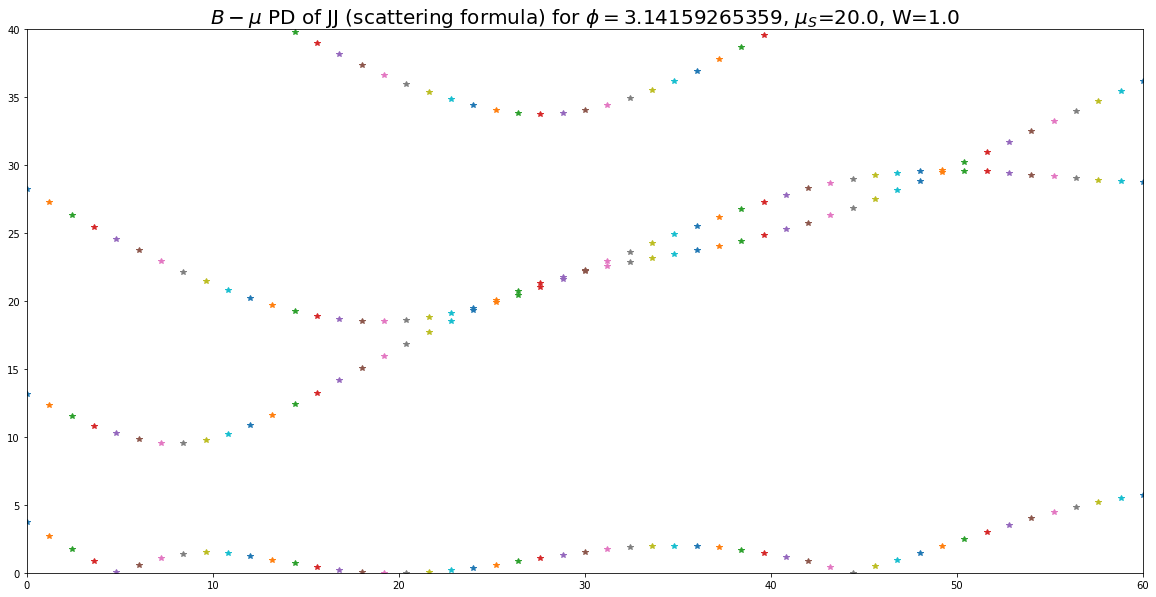

In [39]:
pp.figure(figsize=(20,10))
for i in range(len(muarray)):
    #pp.plot(BmuListcopy[i],[muarray[i]]*len(BmuListcopy[i]),'.')
    #pp.plot(BmuList[i],[muarray[i]]*len(BmuList[i]),'*')
    pp.plot([muarray[i]]*len(BmuList[i]),BmuList[i],'*')
#for n in range(-H,1):
#    pp.plot(xarray,yyarray[n],'--')
#    pp.plot(xx2[n],yarray)

pp.axis([0,60,0,40])
pp.title('$B-\mu$ PD of JJ (scattering formula) for $\phi={}$, $\mu_S$={}, W={}'.format(phi,muSC,W), fontsize=20)
#pp.xlabel('$B/\mu_S$',fontsize=20)
#pp.ylabel('$\mu/\mu_S$',fontsize=20)

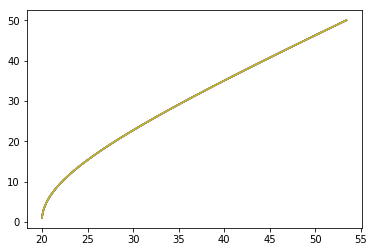

In [234]:
for n in range(-H,1):
    pp.plot(xx2[n],yarray)
#pp.axis([-1,1,0,5])

In [157]:
xx2

[[0.10000246866891939,
  0.10503245137257274,
  0.11424566724456423,
  0.11568703094766757,
  0.10675066416339092,
  0.0941414398833359,
  0.08896867319456463,
  0.09488558136337338,
  0.10380211799872735,
  0.10649357353994392,
  0.09968735158166239,
  0.08758813073014438,
  0.07921471775998787,
  0.08098162048458042,
  0.09009344710789974,
  0.09828025611699064,
  0.09868358174524182,
  0.09007109890833279,
  0.07778044946540086,
  0.06988193725029461,
  0.07147929137949396,
  0.08065248838696772,
  0.09068698486105975,
  0.09447313259337012,
  0.08866098110130508,
  0.07658161074601469,
  0.06533661596387329,
  0.061121088497699635,
  0.06594649451445281,
  0.0765856226920296,
  0.08696509161773637,
  0.09048236666099486,
  0.08414455754870614,
  0.07172737565545177,
  0.059937232440196005,
  0.05416231927207176,
  0.0568212598024504,
  0.0663044286549976,
  0.07824375379532945,
  0.08660481953842684,
  0.08574209111545539,
  0.0758015749177678,
  0.06262709493999519,
  0.0520629799

** Fitting curve **

center=BphiList[0]#M/2 when needed

print(len(center))
print(center)

center[56:59]=[]

pp.plot(center,'*')

from scipy.optimize import curve_fit

def fitfunc(n):#,A,B,al,n0): 
    #8 transitions below 100, first labelled as n=0
    return np.pi**2/2/m/W**2*(n)**2
    #return A*(n+n0)**al+B

popt, pcov = curve_fit(fitfunc, range(len(center)), center)# bounds=([0,0,-np.inf], [np.inf, np.inf, np.inf]))

popt

pp.figure(figsize=(20,10))
#pp.plot(range(len(center)),center)
#fitpoints=[fitfunc(n) for n in range(len(center))]
#pp.plot(range(len(center)),fitpoints,'*')
fitdiff=[fitfunc(n)-center[n] for n in range(len(center))]
pp.plot(range(len(center)), fitdiff,'*')

** Checking the zeros **

In [33]:
def EQint(B,phi):
    th=np.sqrt(2*m*mu*W**2)
    chi=B/mu
    cos1=np.cos(th)*(1-th**2*chi**2/8)-np.sin(th)*(th*chi/2-th*chi**2/8)
    cos2=np.cos(th)*(1-th**2*chi**2/8)-np.sin(th)*(-th*chi/2-th*chi**2/8)
    sin1=np.sin(th)*(1-th**2*chi**2/8)+np.cos(th)*(th*chi/2-th*chi**2/8)
    sin2=np.sin(th)*(1-th**2*chi**2/8)+np.cos(th)*(-th*chi/2-th*chi**2/8)
    return abs((cos1*cos2+(muSC**2+mu**2-B**2)/(2*muSC*cmath.sqrt(mu**2-B**2))*\
                sin1*sin2+np.cos(phi))/cos2)

In [34]:
phi=np.pi/2.
Bxarray=np.linspace(0,20,100000)
detarray3=[EQsign(B,phi) for B in Bxarray]

[0, 20, 0, 15]

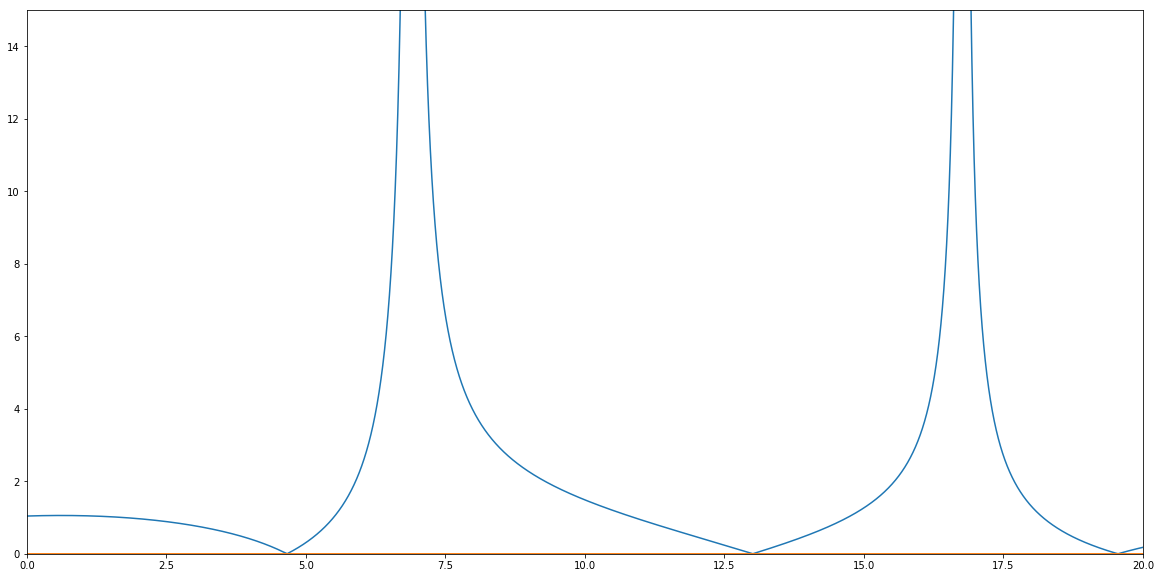

In [35]:
pp.figure(figsize=(20,10))
pp.plot(Bxarray,detarray3,'-')
pp.plot(Bxarray,[0]*len(Bxarray))
pp.axis([0,20,0,15])